# Checking data in the original blacklist

In this notebook we examine the individual images that go into the analysis of our samples of galaxy clusters, to visually inspect them for flaring. Specifically observations that were previously in our blacklist that would have contributed to our analyses if allowed.

## Import Statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity, UnitConversionError
from astropy.cosmology import LambdaCDM, WMAP9
import matplotlib.pyplot as plt
from typing import Union, List
from shutil import rmtree
import os
import json

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import xcs3p_colour, xcs_cosmo, xxlgc100_colour, xxl_cosmo, locuss_colour, locuss_cosmo

import xga
# This just sets the number of cores this analysis is allowed to use
xga.NUM_CORES = 20
# This is a bodge that will only work because xga_output in notebooks has already been defined, XGA
#  will be made to handle this more gracefully at some point
temp_dir = xga.OUTPUT
actual_dir = temp_dir.split('notebooks/')[0]+'notebooks/xga_output/'
xga.OUTPUT = actual_dir
xga.utils.OUTPUT = actual_dir
# As currently XGA will setup an xga_output directory in our current directory, I remove it to keep it all clean
if os.path.exists('xga_output'):
    rmtree('xga_output')
from xga.samples import ClusterSample
from xga.products import Image

import warnings
warnings.filterwarnings('ignore')

## Reading in ObsID information

In [4]:
with open('../../outputs/og_obs_info.json', 'r') as reado:
    og_obs = json.load(reado)
    
with open('../../outputs/obs_info.json', 'r') as reado:
    obs = json.load(reado)

In [6]:
rel_obs = [o for o in obs if o not in og_obs]

33

## Viewing individual observations

Currently XGA cannot easily create stacks of individual ObsIDs (though that feature is under development), so as a stopgap measure I will make use of existing XCS combined images. There will be no difference to those that will eventually be created by XGA. These will enable us to judge whether a particular ObsID is flared or not.

In [8]:
comb_path = '/its/home/dt237/xmm_obs/data/{o}/images/{o}-0.50-2.00keVmerged_img.fits'

### For Review

0403760101


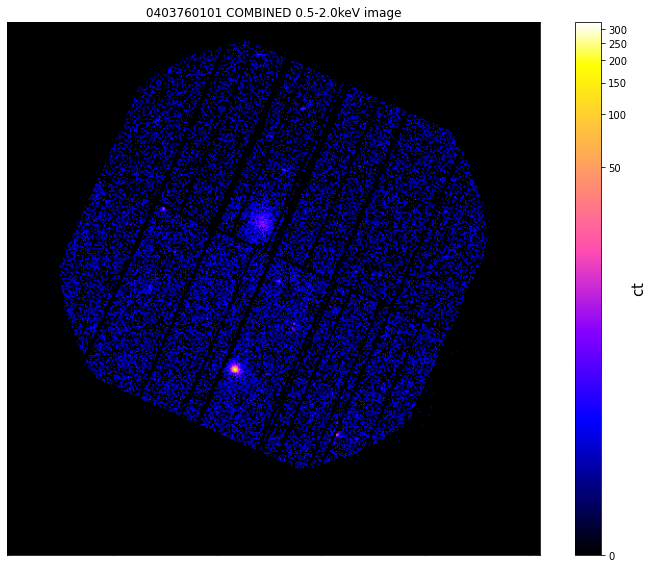

0652460101


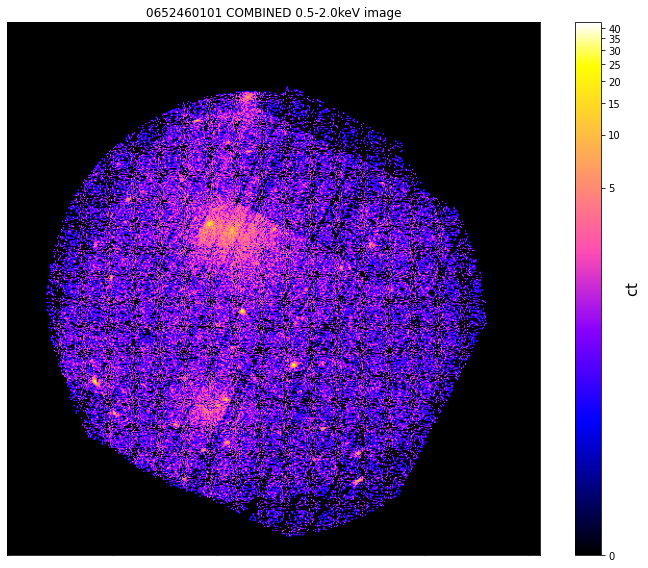

0677681240


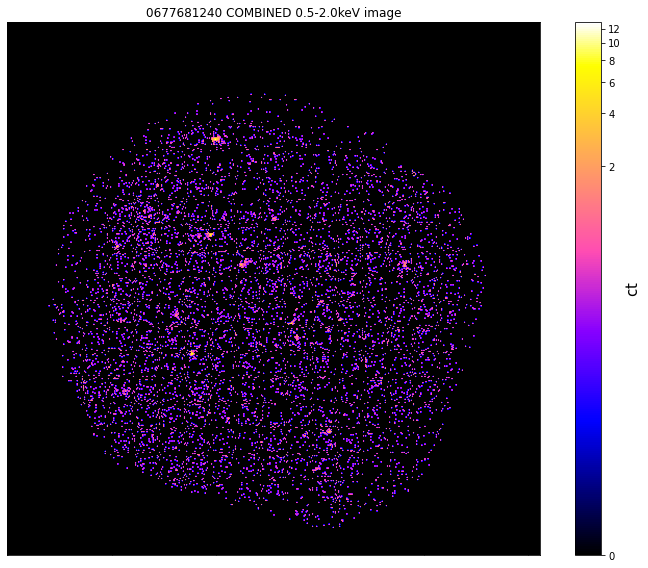

0404960201


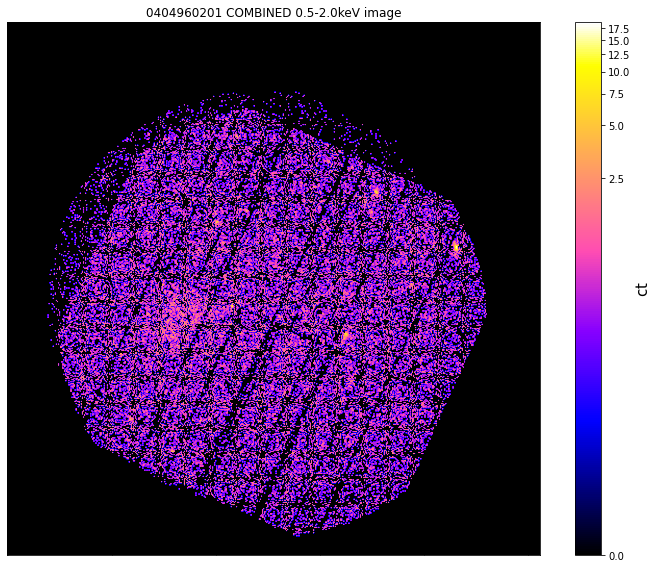

0605000801


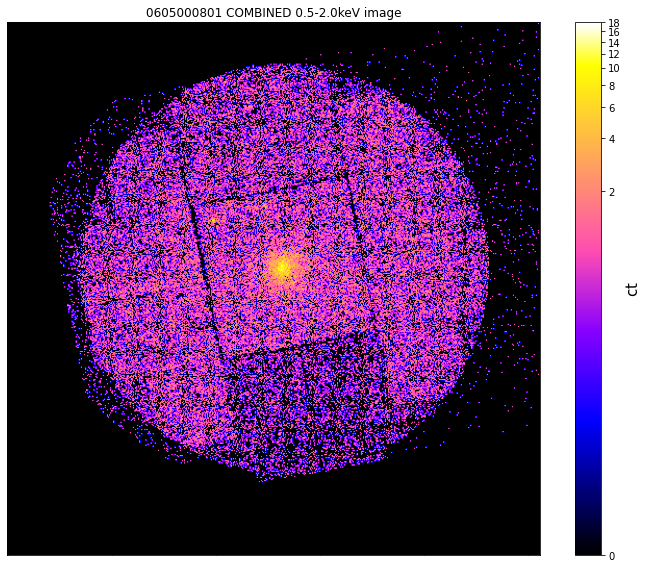

0827051101


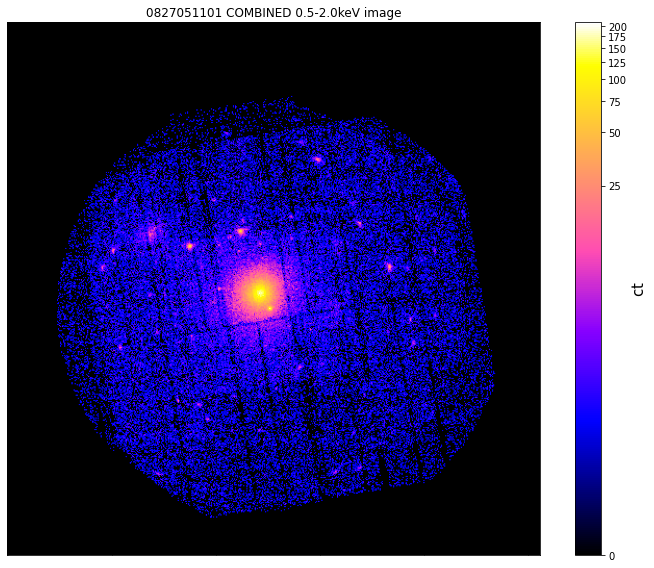

0827041001


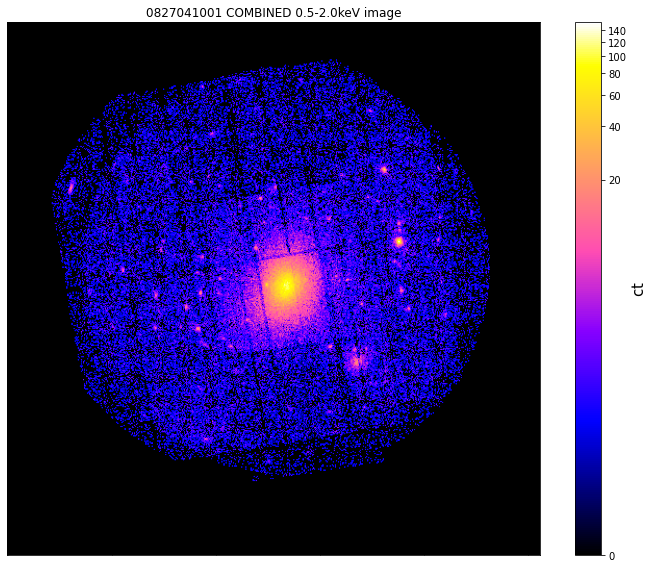

0827351301


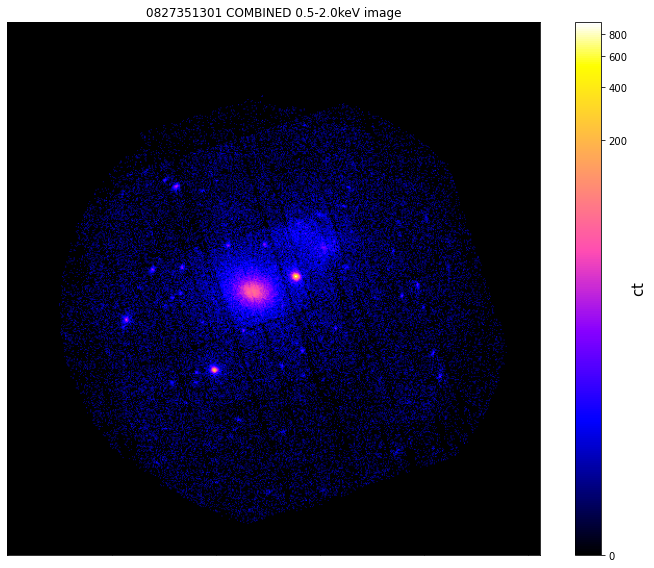

0150970101


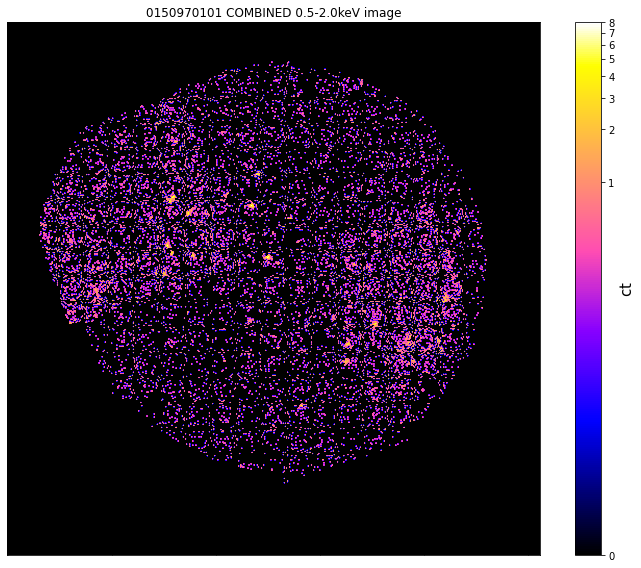

0761590101


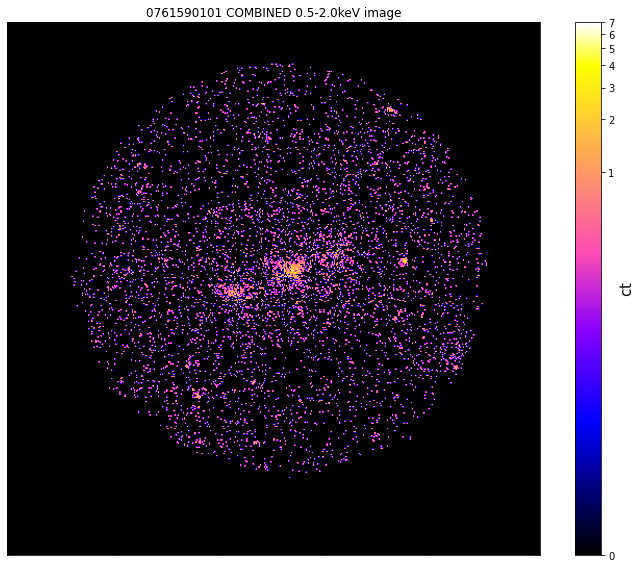

0046940101


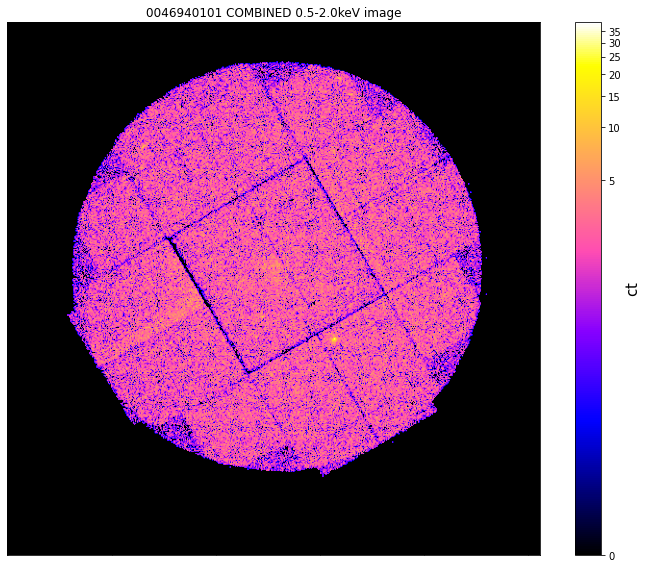

0744370301


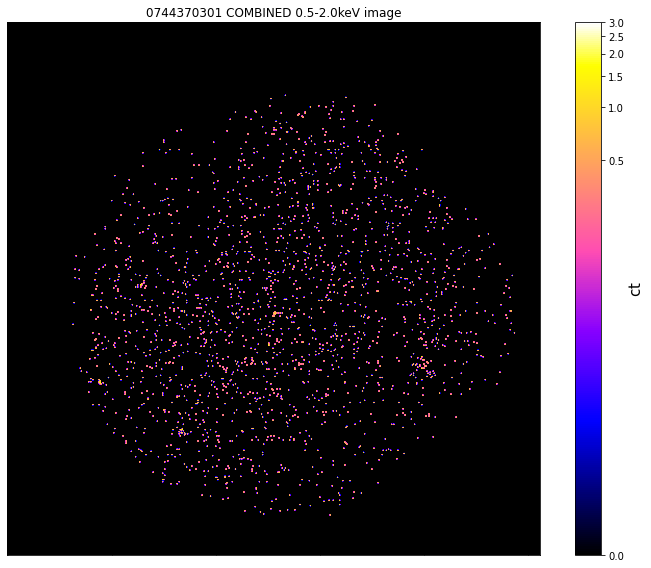

0744370401


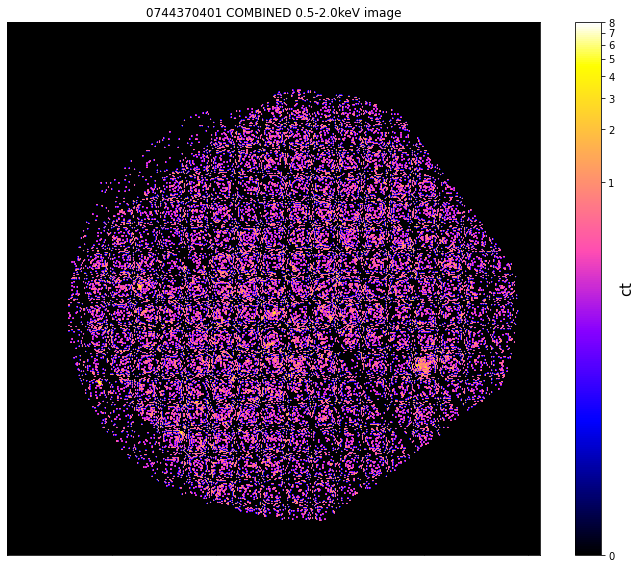

0827341301


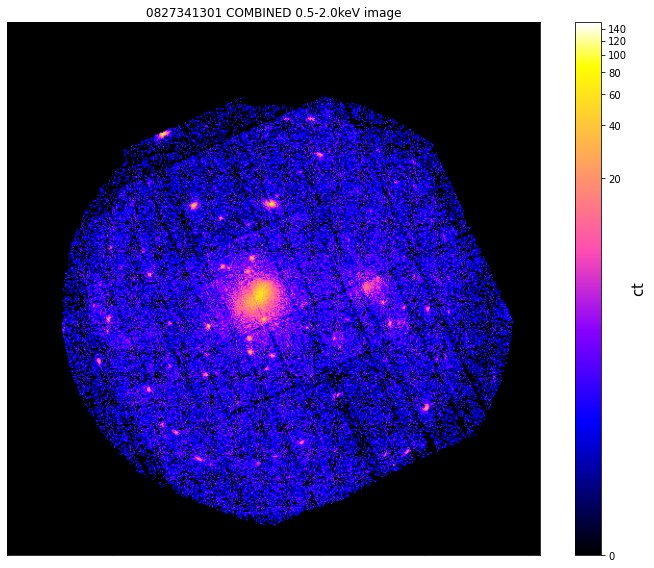

0722660301


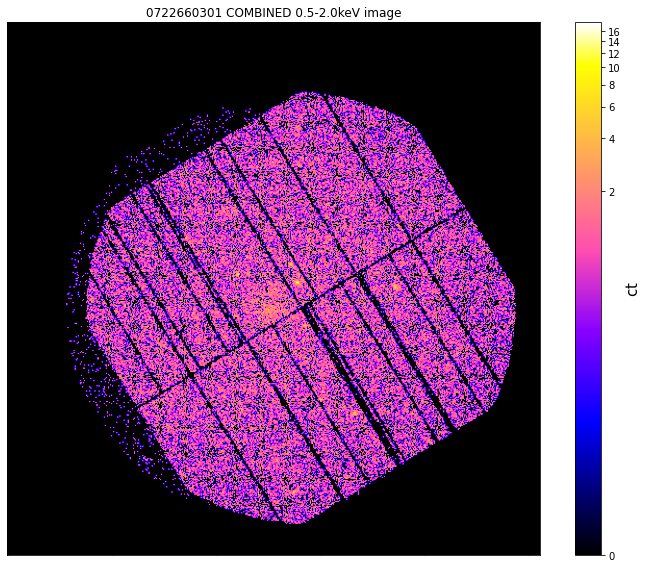

0650382601


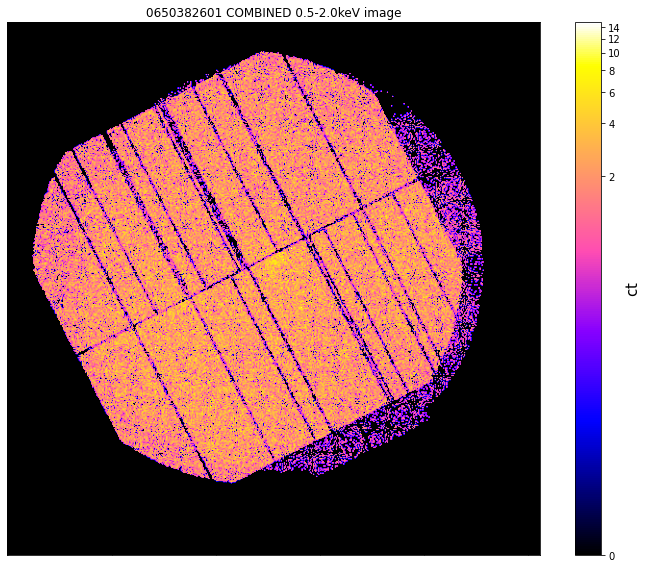

0821871301


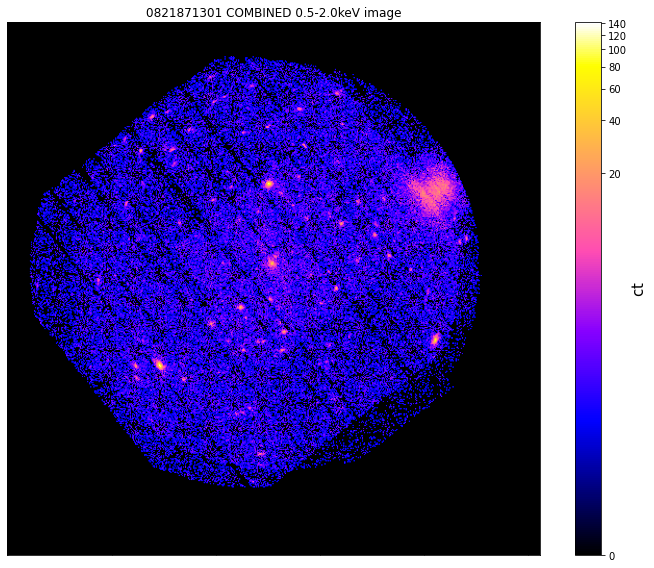

0148250101


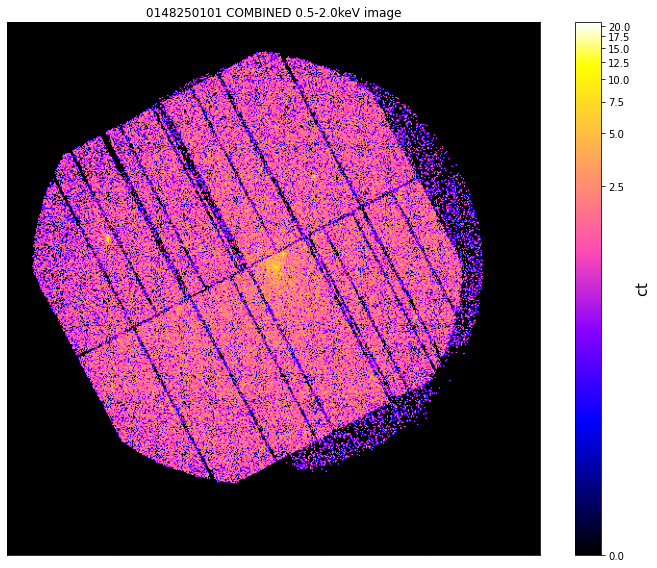

0827350101


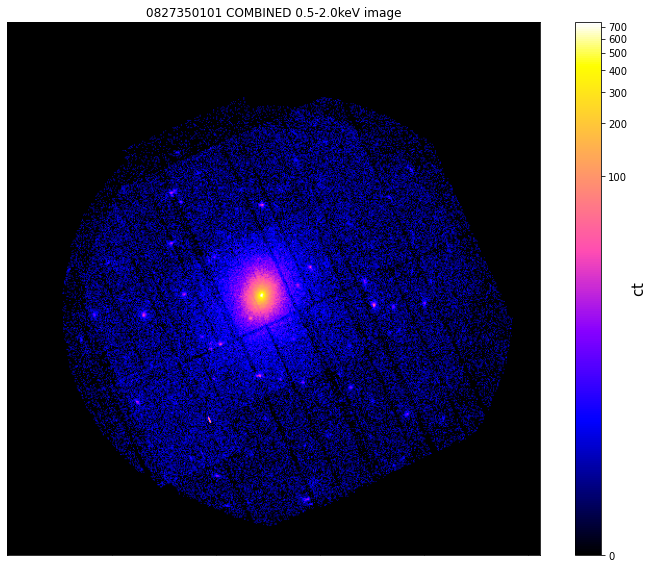

0303930201


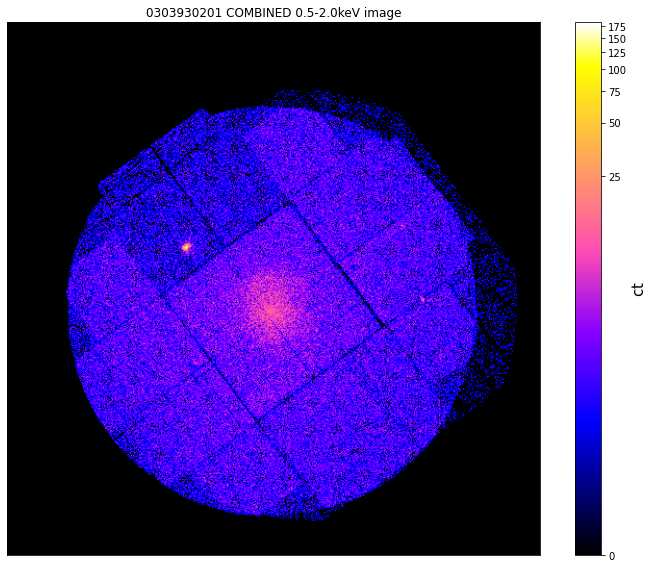

0112231901


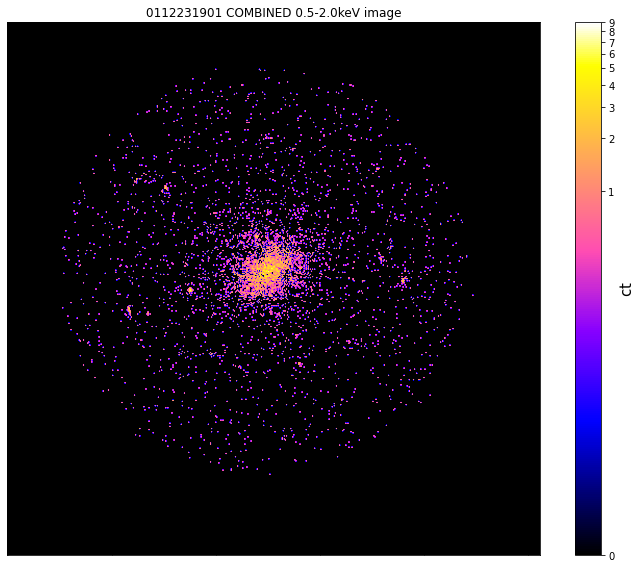

0112231801


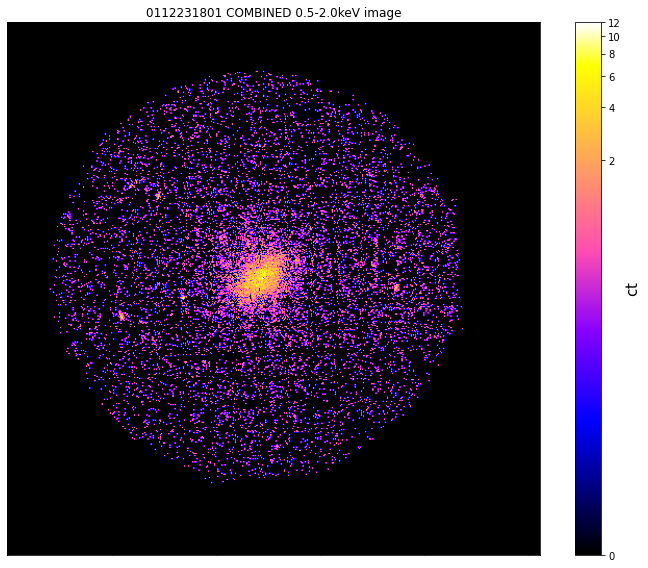

0093031801


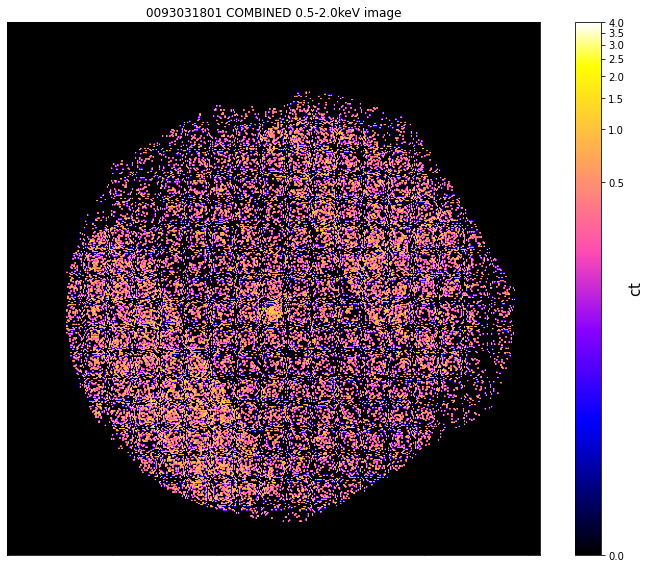

0093030901


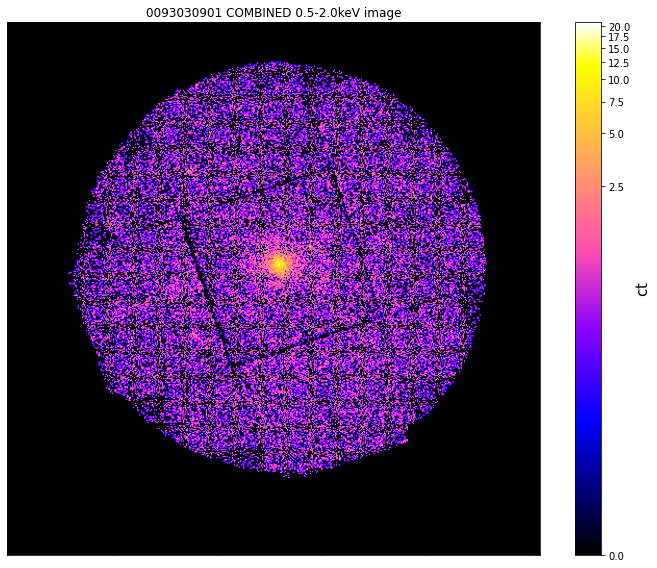

0093031101


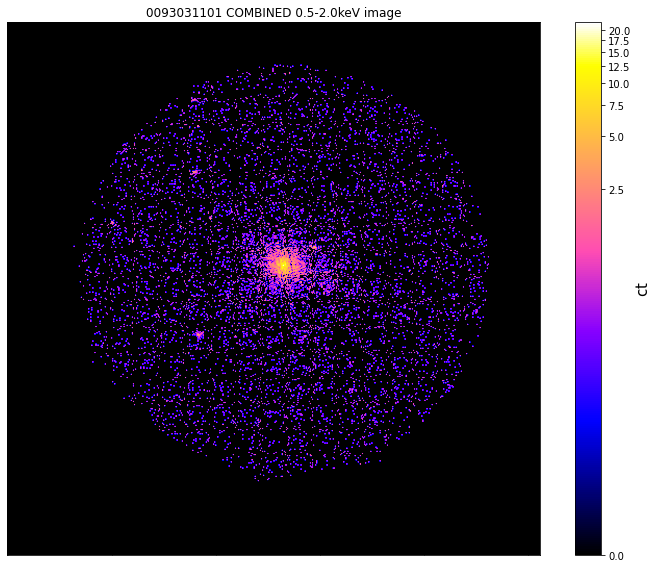

0093031401


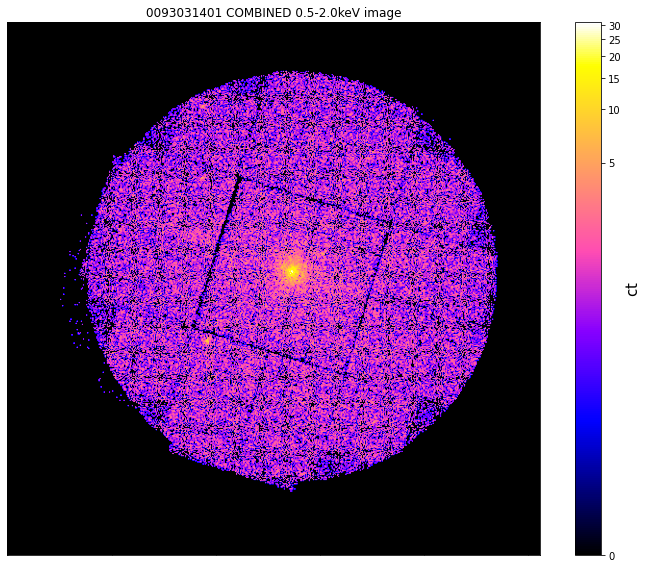

0093031501


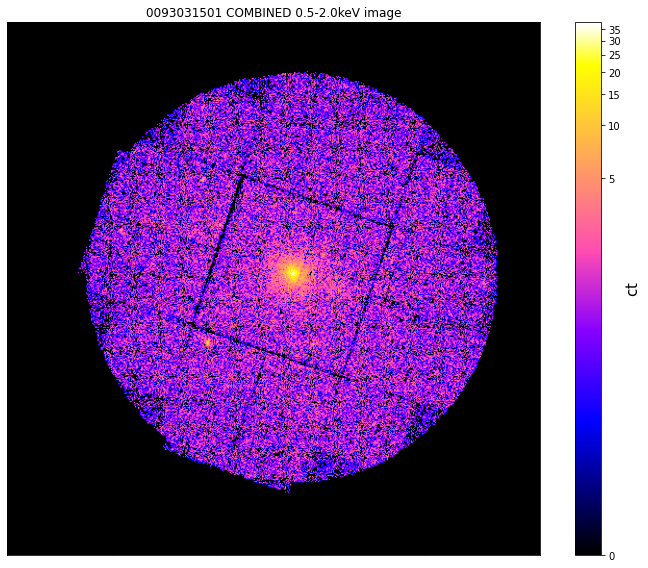

0093031001


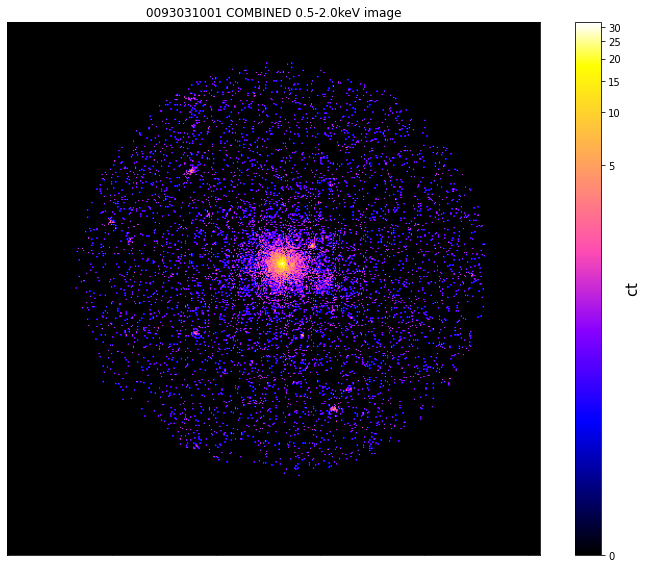

0841950101


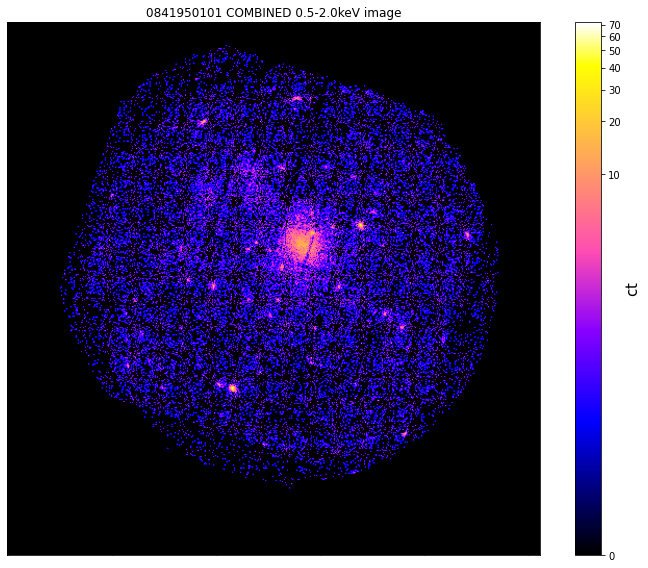

0762871001


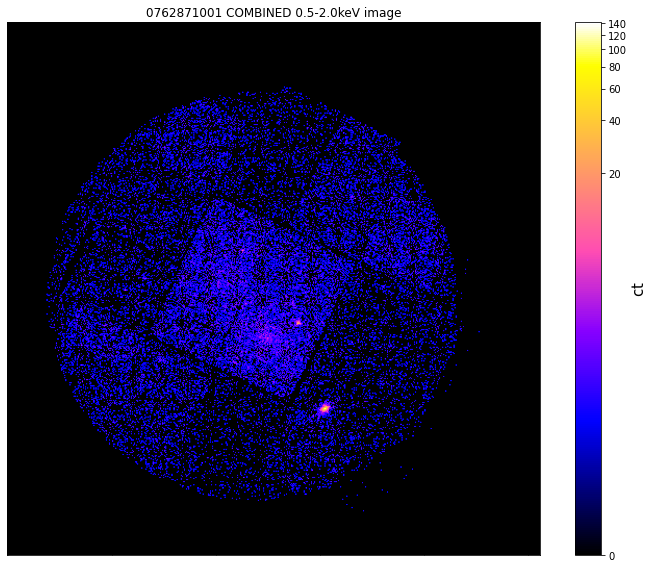

0042341201


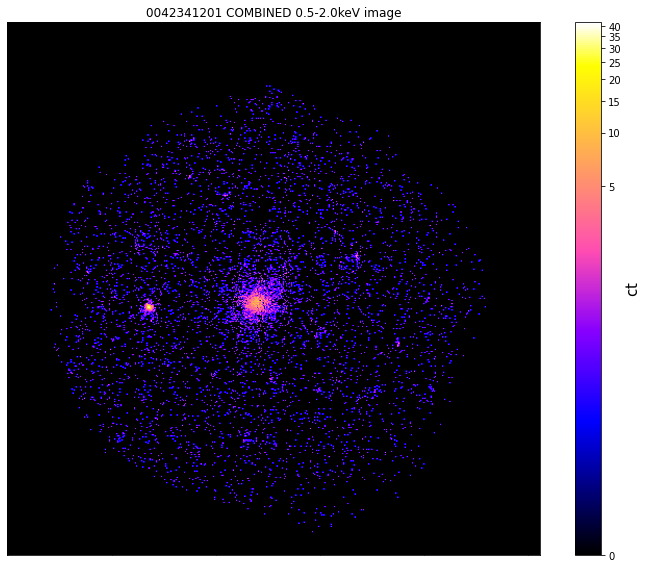

0827350401


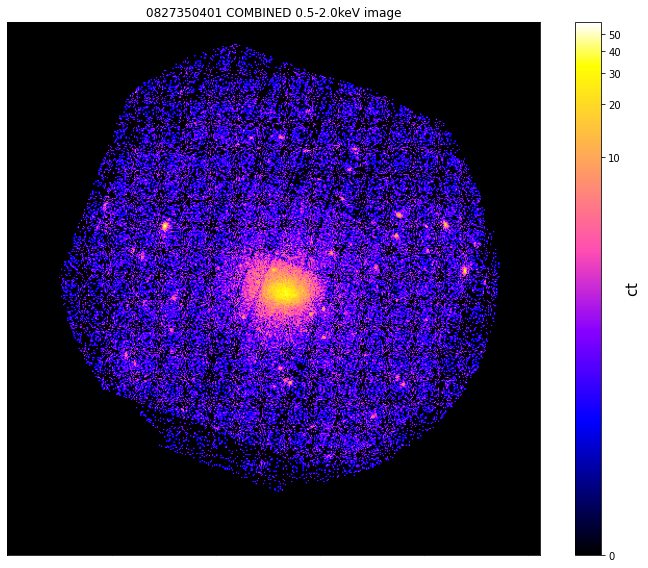

0677680132


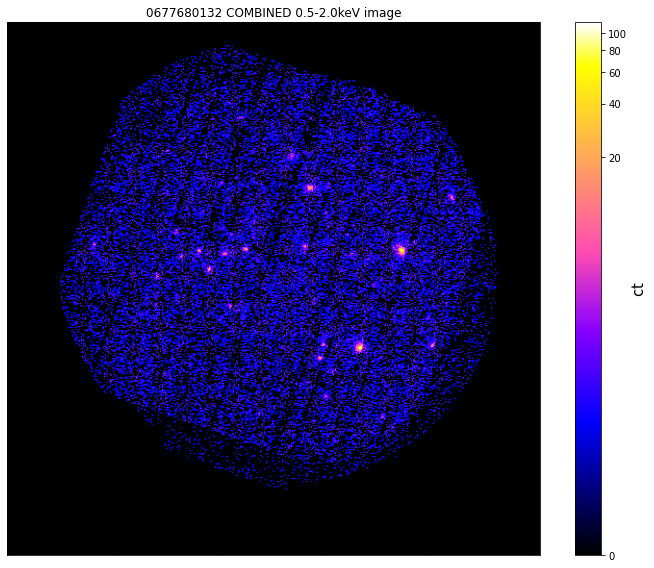

Victory


In [9]:
# This is a bit silly as I'm using XGA ratemaps to construct the path to existing XCS images but oh well
for o in rel_obs:
    cur_pth = comb_path.format(o=o)
    cur_im = Image(cur_pth, o, 'combined', '', '', '', Quantity(0.5, 'keV'), Quantity(2.0, 'keV'))
    print(cur_im.obs_id)
    cur_im.view()
    plt.close('all')
print('Victory')

## Paul's Notes

* 0403760101
* 0652460101
* 0677681240
* 0404960201
* 0605000801
* 0150970101
* 0761590101
* 0046940101
* 0744370301
* 0744370401
* 0722660301
* 0650382601
* 0148250101
* 0303930201
* 0112231901
* 0112231801
* 0093031801
* 0093030901
* 0093031101
* 0093031401
* 0093031501
* 0093031001
* 0762871001
* 0827350401
* 0677680132